In [1]:
#rnn text 생성

In [36]:
import numpy as np
import nltk
from konlpy.tag import *
from keras.preprocessing import *
from nltk.tokenize import *
from konlpy.corpus import kolaw
from konlpy.tag import Okt
from keras.preprocessing.text import *

In [27]:
okt=Okt()

In [28]:
c=kolaw.open('constitution.txt').read()

In [29]:
len(sent_tokenize(c))
sentents=[s for s in sent_tokenize(c)]
sentents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

In [30]:
doc0=[" ".join(["".join(w) for w, t in okt.pos(s) 
                if w not in ["제","조"] and
                t not in ['Number','Foreign']]) 
      for s in sent_tokenize(c)]
doc0[3]
#대한민국의 국민이 되는 요건은 법률로 정한다
# for s in sent_tokenize(c):
#     for w, t in okt.pos(s):
#         if t not in ['Number', 'Foreign'] and w not in ['제','조']:
#             print(w)
 

'대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'

In [31]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(doc0)

In [32]:
doc=[l for l in tokenizer.texts_to_sequences(doc0) 
     if len(l)>1]
len(doc)
len(doc0)
doc[3]
#대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 

[102, 1, 22, 5, 111, 653, 4, 9, 24, 13, 6]

In [33]:
maxlen=max([len(x)-1 for x in doc]) #전체 문장 중에서 가장 많은 단어의 수
vocab_size=len(tokenizer.word_index)+1 #전체 단어 수
#print(maxlen)
    #print(len(x))
print(maxlen, vocab_size)

187 1165


In [50]:
from keras.utils import np_utils

In [56]:
def generate_data(x, maxlen, vocab_size):
    for sentence in x:
        #print(sentence)   
    #대한민국 의/은/헌법
    #대한민국 의 헌법/위치/크기/국민
    #대한민국 의 헌법 은/을...
    
    
#'대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .'
        inputs=[]
        targets=[]
        for i in range(1,len(sentence)):
            inputs.append(sentence[0:i])
            targets.append(sentence[i])
        y=np_utils.to_categorical(targets, vocab_size)
        inputs_sequence=sequence.pad_sequences(inputs, maxlen=maxlen)
        yield(inputs_sequence, y)
#입력:[000.....0 102] =>출력: [00000..10000...000]
#           대한민국 =>                의
        #print(inputs_sequence)
        #print(y)
        #print(y.shape) #(문장 단어수, 모든 단어 개수=1165)
       
        
for i, (x,y) in enumerate(generate_data(doc,maxlen,vocab_size)):
    print("인덱스 번호:", i)
    print("x data:", x.shape, "\n", x)
    print("y data:", y.shape, "\n", y)
    

인덱스 번호: 0
x data: (187, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102  28]
 [  0   0   0 ... 102  28 602]
 ...
 [  0   0 102 ... 647 155   2]
 [  0 102  28 ... 155   2  20]
 [102  28 602 ...   2  20 180]]
y data: (187, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 1
x data: (6, 187) 
 [[  0   0   0 ...   0   0  45]
 [  0   0   0 ...   0  45 439]
 [  0   0   0 ...  45 439 648]
 [  0   0   0 ... 439 648 102]
 [  0   0   0 ... 648 102   4]
 [  0   0   0 ... 102   4 649]]
y data: (6, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 2
x data: (12, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102   1]
 [  0   0   0 ... 102   1 440]
 ...
 [  0   0   0 ...  34 651   4]
 [  0   0   0 ... 651   4  22]
 [  0   0   0 ...   4 

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 138
x data: (35, 187) 
 [[  0   0   0 ...   0   0 149]
 [  0   0   0 ...   0 149   2]
 [  0   0   0 ... 149   2  20]
 ...
 [  0   0   0 ... 871   5  78]
 [  0   0   0 ...   5  78 113]
 [  0   0   0 ...  78 113  11]]
y data: (35, 1165) 
 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 139
x data: (17, 187) 
 [[  0   0   0 ...   0   0   9]
 [  0   0   0 ...   0   9   4]
 [  0   0   0 ...   9   4 235]
 ...
 [  0   0   0 ... 218 264 124]
 [  0   0   0 ... 264 124   3]
 [  0   0   0 ... 124   3 532]]
y data: (17, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 140
x data: (9, 187) 
 [[  0   0 

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 248
x data: (30, 187) 
 [[  0   0   0 ...   0   0  22]
 [  0   0   0 ...   0  22  63]
 [  0   0   0 ...  22  63   1]
 ...
 [  0   0   0 ... 319  88   8]
 [  0   0   0 ...  88   8 173]
 [  0   0   0 ...   8 173  14]]
y data: (30, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 249
x data: (17, 187) 
 [[ 0  0  0 ...  0  0 22]
 [ 0  0  0 ...  0 22 63]
 [ 0  0  0 ... 22 63 66]
 ...
 [ 0  0  0 ... 46  4  9]
 [ 0  0  0 ...  4  9 24]
 [ 0  0  0 ...  9 24 13]]
y data: (17, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호: 250
x data: (16, 187) 
 [[  0   0   0 ...   0   0  25]
 [  0   0   0 

In [63]:
X=[]
Y=[]
for x,y in generate_data(doc,maxlen,vocab_size):
    X.append(x)
    Y.append(y)
X=np.concatenate(X)
Y=np.concatenate(Y)
print(X.shape)
print(Y.shape)
    


(6917, 187)
(6917, 1165)


In [70]:
# [102, 28, ... ] => [102] =>[28], [102,28] =>[]
# [0,...,   20,1]
#        187
# <------------->
#Modeling
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
model=Sequential() # 1165
model.add(Embedding(vocab_size,100, input_length=maxlen))
#(None,187,100)
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(vocab_size, activation='softmax'))

W0830 10:33:58.293598 10336 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0830 10:33:58.299582 10336 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 187, 100)          116500    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1165)              117665    
Total params: 314,565
Trainable params: 314,565
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(), metrics=['accuracy'])

W0830 10:35:35.997398 10336 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0830 10:35:35.997398 10336 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [73]:
hist=model.fit(X, Y, epochs=500, 
               batch_size=800, verbose=2)

W0830 10:36:13.841287 10336 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
 - 14s - loss: 6.6702 - acc: 0.0438
Epoch 2/500
 - 14s - loss: 5.8429 - acc: 0.0505
Epoch 3/500
 - 14s - loss: 5.7511 - acc: 0.0493
Epoch 4/500
 - 14s - loss: 5.7352 - acc: 0.0453
Epoch 5/500
 - 14s - loss: 5.7075 - acc: 0.0515
Epoch 6/500
 - 15s - loss: 5.6881 - acc: 0.0496
Epoch 7/500
 - 15s - loss: 5.6725 - acc: 0.0487
Epoch 8/500
 - 15s - loss: 5.6491 - acc: 0.0515
Epoch 9/500
 - 16s - loss: 5.6254 - acc: 0.0479
Epoch 10/500
 - 16s - loss: 5.5877 - acc: 0.0516
Epoch 11/500
 - 16s - loss: 5.5557 - acc: 0.0515
Epoch 12/500
 - 17s - loss: 5.5180 - acc: 0.0529
Epoch 13/500
 - 18s - loss: 5.4819 - acc: 0.0544
Epoch 14/500
 - 18s - loss: 5.4403 - acc: 0.0545
Epoch 15/500
 - 19s - loss: 5.4113 - acc: 0.0548
Epoch 16/500
 - 20s - loss: 5.3712 - acc: 0.0558
Epoch 17/500
 - 20s - loss: 5.3447 - acc: 0.0564
Epoch 18/500
 - 20s - loss: 5.2957 - acc: 0.0591
Epoch 19/500
 - 21s - loss: 5.2675 - acc: 0.0622
Epoch 20/500
 - 21s - loss: 5.2211 - acc: 0.0642
Epoch 21/500
 - 21s - loss: 5

 - 22s - loss: 2.1190 - acc: 0.5155
Epoch 168/500
 - 22s - loss: 2.0995 - acc: 0.5280
Epoch 169/500
 - 22s - loss: 2.0904 - acc: 0.5213
Epoch 170/500
 - 23s - loss: 2.0893 - acc: 0.5168
Epoch 171/500
 - 22s - loss: 2.0754 - acc: 0.5284
Epoch 172/500
 - 23s - loss: 2.0526 - acc: 0.5291
Epoch 173/500
 - 22s - loss: 2.0529 - acc: 0.5316
Epoch 174/500
 - 22s - loss: 2.0398 - acc: 0.5340
Epoch 175/500
 - 22s - loss: 2.0166 - acc: 0.5358
Epoch 176/500
 - 22s - loss: 2.0085 - acc: 0.5385
Epoch 177/500
 - 23s - loss: 2.0016 - acc: 0.5460
Epoch 178/500
 - 22s - loss: 2.0028 - acc: 0.5424
Epoch 179/500
 - 22s - loss: 1.9877 - acc: 0.5475
Epoch 180/500
 - 22s - loss: 1.9871 - acc: 0.5468
Epoch 181/500
 - 22s - loss: 1.9817 - acc: 0.5442
Epoch 182/500
 - 22s - loss: 1.9475 - acc: 0.5576
Epoch 183/500
 - 22s - loss: 1.9293 - acc: 0.5533
Epoch 184/500
 - 22s - loss: 1.9339 - acc: 0.5560
Epoch 185/500
 - 22s - loss: 1.9330 - acc: 0.5533
Epoch 186/500
 - 22s - loss: 1.9273 - acc: 0.5544
Epoch 187/500


 - 22s - loss: 1.0813 - acc: 0.7425
Epoch 332/500
 - 22s - loss: 1.0597 - acc: 0.7443
Epoch 333/500
 - 22s - loss: 1.0577 - acc: 0.7450
Epoch 334/500
 - 22s - loss: 1.0483 - acc: 0.7443
Epoch 335/500
 - 22s - loss: 1.0460 - acc: 0.7492
Epoch 336/500
 - 22s - loss: 1.0279 - acc: 0.7502
Epoch 337/500
 - 22s - loss: 1.0372 - acc: 0.7561
Epoch 338/500
 - 22s - loss: 1.0395 - acc: 0.7467
Epoch 339/500
 - 22s - loss: 1.0483 - acc: 0.7428
Epoch 340/500
 - 22s - loss: 1.0384 - acc: 0.7483
Epoch 341/500
 - 22s - loss: 1.0329 - acc: 0.7490
Epoch 342/500
 - 22s - loss: 1.0275 - acc: 0.7471
Epoch 343/500
 - 22s - loss: 1.0357 - acc: 0.7484
Epoch 344/500
 - 22s - loss: 1.0303 - acc: 0.7447
Epoch 345/500
 - 22s - loss: 1.0167 - acc: 0.7542
Epoch 346/500
 - 22s - loss: 1.0242 - acc: 0.7466
Epoch 347/500
 - 22s - loss: 0.9945 - acc: 0.7616
Epoch 348/500
 - 22s - loss: 1.0114 - acc: 0.7544
Epoch 349/500
 - 22s - loss: 1.0107 - acc: 0.7577
Epoch 350/500
 - 22s - loss: 1.0051 - acc: 0.7581
Epoch 351/500


 - 24s - loss: 0.6949 - acc: 0.8242
Epoch 496/500
 - 23s - loss: 0.6897 - acc: 0.8248
Epoch 497/500
 - 22s - loss: 0.6855 - acc: 0.8291
Epoch 498/500
 - 22s - loss: 0.6789 - acc: 0.8330
Epoch 499/500
 - 22s - loss: 0.6825 - acc: 0.8252
Epoch 500/500
 - 22s - loss: 0.6933 - acc: 0.8246


In [74]:
model.save("rnn_text_gen.hdf5")

In [75]:
from keras.models import *
mymodel=load_model("rnn_text_gen.hdf5")

In [76]:
word_list="대한민국 의 국민 이 되는 요건 은 법률 로 정한 다 .".split(" ")

In [77]:
word_list

['대한민국', '의', '국민', '이', '되는', '요건', '은', '법률', '로', '정한', '다', '.']

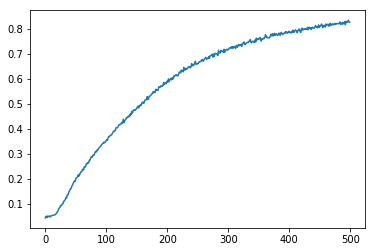

In [80]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.show()

In [88]:
reverse_word_map=dict(map(reversed,tokenizer.word_index.items())) #1164
len(reverse_word_map)

1164

In [98]:
x=sequence.pad_sequences([[tokenizer.word_index[w] 
                           for w in word_list[:2]]], 
                         maxlen=maxlen)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [104]:
p=model.predict(x)[0]
p

array([2.45324799e-07, 5.65386377e-04, 9.34153068e-05, ...,
       2.08642561e-07, 1.35570035e-05, 1.96492638e-05], dtype=float32)

In [105]:
np.argmax(p)

441

In [110]:
idx=np.flip(np.argsort(p),0)

In [111]:
for i in idx[:5]:
    print(reverse_word_map[i])

영토
주권
모든
국민
경


In [ ]:
def predict_word(i, n=1):
    # 함수를 구현하세요
predict_word(1, n=3)

""

#n: 가장 확률이 높은 3개 단어 출력
#1: 첫번째 단어
#predict_word(1, n=3)
대한민국 의(62%)
         은(30%)
         헌법(2%)
#predict_word(2, n=3)        
대한민국 의 영토(20%)
            국민(15%)
            주권(12%)

In [34]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
#word2vec 모델 생성
#api 문서 참조
#most_similar("kid"), most_similar("man")...
#유사도 높은 단어 출력
#most_similar_cosmul("kid"), "man"
#similarity("boy","girl") #actor/actress...
# 감성분석

In [37]:
A = np.arange(8).reshape((2,2,2))

In [38]:
A

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [39]:
np.flip(A, 0)

array([[[4, 5],
        [6, 7]],

       [[0, 1],
        [2, 3]]])

In [40]:
np.flip(A, 1)

array([[[2, 3],
        [0, 1]],

       [[6, 7],
        [4, 5]]])

In [41]:
np.flip(A)

array([[[7, 6],
        [5, 4]],

       [[3, 2],
        [1, 0]]])

In [42]:
np.flip(A, (0, 2))

array([[[5, 4],
        [7, 6]],

       [[1, 0],
        [3, 2]]])

In [43]:
A = np.arange(8).reshape(4,2)

In [44]:
A

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [46]:
np.flip(A, 1)

array([[1, 0],
       [3, 2],
       [5, 4],
       [7, 6]])